In [ ]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Access a public Github repos
!rm -rf /content/Brain-CT-Hemorrhage-Dataset # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/Brain-CT-Hemorrhage-Dataset.git

/content
Cloning into 'Brain-CT-Hemorrhage-Dataset'...
remote: Enumerating objects: 6760, done.
remote: Total 6760 (delta 0), reused 0 (delta 0), pack-reused 6760
Receiving objects: 100% (6760/6760), 125.66 MiB | 19.37 MiB/s, done.
Resolving deltas: 100% (108/108), done.
Updating files: 100% (7696/7696), done.


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [ ]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [ ]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["Brain-CT-Hemorrhage-Dataset"]

for folder in repository_folder:
  local_path = '/content/' + folder + '/dataset'
  DataSetSummary(local_path, 0)
  local_path = '/content/' + folder + '/sample'
  DataSetSummary(local_path, 0)

Tổng số thư mục: 2
-Thư mục: NORMAL, Số tệp: 27
	Tổng số thư mục: 27
	-Thư mục: N3[N3], Số tệp: 360
	-Thư mục: N17[N17], Số tệp: 140
	-Thư mục: N25[N25], Số tệp: 123
	-Thư mục: N16[N16], Số tệp: 131
	-Thư mục: N9[N9], Số tệp: 138
	-Thư mục: N13[N13], Số tệp: 128
	-Thư mục: N7[N7], Số tệp: 132
	-Thư mục: N26[N26], Số tệp: 129
	-Thư mục: N23[N23], Số tệp: 134
	-Thư mục: N15[N15], Số tệp: 132
	-Thư mục: N21[N21], Số tệp: 131
	-Thư mục: N4[N4], Số tệp: 126
	-Thư mục: N8[N8], Số tệp: 63
	-Thư mục: N11[N11], Số tệp: 128
	-Thư mục: N18[N18], Số tệp: 217
	-Thư mục: N22[N22], Số tệp: 228
	-Thư mục: N24[N24], Số tệp: 132
	-Thư mục: N12[N12], Số tệp: 130
	-Thư mục: N19[N19], Số tệp: 112
	-Thư mục: N27[N27], Số tệp: 136
	-Thư mục: N20[N20], Số tệp: 255
	-Thư mục: N6[N6], Số tệp: 135
	-Thư mục: N14[N14], Số tệp: 46
	-Thư mục: N10[N10], Số tệp: 122
	-Thư mục: N5[N5], Số tệp: 127
	-Thư mục: N2[N2], Số tệp: 238
	-Thư mục: N1[N1], Số tệp: 232
-Thư mục: Hemorrhagic, Số tệp: 1
	Tổng số thư mục: 1
	-Thư m

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-CT-Hemorrhage-Dataset

/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-CT-Hemorrhage-Dataset


In [ ]:
# Set the path to your dataset
dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/sample'
# dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/dataset'

In [ ]:
import os

def list_dirs_recursively(path, seen=None):
    if seen is None:
        seen = set()

    for dirpath, dirnames, filenames in os.walk(path):
        if dirpath not in seen:
            print(f'{dirpath}')
            seen.add(dirpath)
            for dirname in dirnames:
                list_dirs_recursively(os.path.join(dirpath, dirname), seen)

dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/dataset'
list_dirs_recursively(dataset_path)

/content/Brain-CT-Hemorrhage-Dataset/dataset
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N23[N23]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N6[N6]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N1[N1]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N13[N13]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N18[N18]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N17[N17]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N27[N27]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N8[N8]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N25[N25]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N22[N22]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N15[N15]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N19[N19]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N14[N14]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N24[N24]
/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N10

In [ ]:
class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder('/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA')
imshow(images, 10)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
print('images.keys:', images.keys())
image_path = "/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/11[11]/11_0_0.jpg"
# print('image_path:',image_path := images['normal'][0].path)
image_specifications = get_image_specifications(image_path)
print(image_specifications)

images.keys: dict_keys(['21[21] _2', '5[5]', '19[19]', '17[17]__', '15[15]', '3[3]', '11[11]', '7[7]', '13[13]', '14[14]', '4[4]', '9[9]', '20[20]_2', '8[8]', '12[12]', '6[6]', '1[1]', '2[2]'])
Image Format: JPEG
Image Mode: RGB
Image Size: (512, 512) pixels (Width: 512, Height: 512)
Image Colors: [(8111, (255, 255, 255)), (356, (253, 253, 253)), (305, (251, 251, 251)), (254, (249, 249, 249)), (220, (247, 247, 247)), (168, (245, 245, 245)), (133, (243, 243, 243)), (130, (241, 241, 241)), (108, (239, 239, 239)), (108, (237, 237, 237)), (77, (235, 235, 235)), (96, (233, 233, 233)), (87, (231, 231, 231)), (81, (229, 229, 229)), (92, (227, 227, 227)), (93, (225, 225, 225)), (76, (223, 223, 223)), (79, (221, 221, 221)), (102, (219, 219, 219)), (107, (217, 217, 217)), (120, (215, 215, 215)), (108, (213, 213, 213)), (141, (211, 211, 211)), (126, (209, 209, 209)), (150, (207, 207, 207)), (172, (205, 205, 205)), (164, (203, 203, 203)), (190, (201, 201, 201)), (236, (199, 199, 199)), (245, (197,

## Noise Metrics

GitHub Copilot: The evaluation metrics indicate that both the Github Copilot's code and ChatGPT's code have successfully reduced the noise in the image, as evidenced by the non-infinite PSNR and non-zero RMSE values.

The PSNR (Peak Signal-to-Noise Ratio) is a measure of the peak error. The fact that PSNR is infinite for the original image indicates there's no noise (as it's being compared with itself), while for the processed images, the PSNR values are finite and quite high, indicating a low level of distortion.

The RMSE (Root Mean Square Error) is a quadratic scoring rule that measures the average magnitude of the error. The fact that RMSE is zero for the original image indicates there's no error (as it's being compared with itself), while for the processed images, the RMSE values are non-zero but quite low, indicating a low level of error.

The SNR (Signal-to-Noise Ratio) is a measure of signal strength relative to background noise. The negative SNR values indicate that the noise is stronger than the signal, which is not ideal. However, the SNR values have increased (become less negative) from the original to the processed images, indicating that the signal has become stronger relative to the noise.

In terms of comparison between Github Copilot's code and ChatGPT's code, the metrics are quite similar, but ChatGPT's code has slightly better PSNR and RMSE values, indicating slightly less distortion and error. However, the differences are quite small and may not be noticeable in the image quality.

GitHub Copilot: Dĩ nhiên, dưới đây là các định nghĩa bằng tiếng Việt:

1. PSNR (Peak Signal-to-Noise Ratio - Tỉ lệ tín hiệu so với nhiễu): PSNR là một độ đo chất lượng của hình ảnh đã được khôi phục so với hình ảnh gốc. PSNR càng cao, chất lượng hình ảnh khôi phục càng tốt và càng giống với hình ảnh gốc.

2. RMSE (Root Mean Square Error - Sai số bình phương trung bình): RMSE là một độ đo sự khác biệt giữa các giá trị dự đoán bởi một mô hình và các giá trị thực tế. RMSE càng thấp, mô hình dự đoán càng chính xác.

3. SNR (Signal-to-Noise Ratio - Tỉ lệ tín hiệu so với nhiễu): SNR là một độ đo chất lượng tín hiệu so với nhiễu. SNR càng cao, chất lượng tín hiệu càng tốt và nhiễu càng ít.

Lưu ý rằng, mặc dù PSNR, RMSE, và SNR cao thường cho thấy chất lượng hình ảnh tốt hơn, nhưng chúng không phải lúc nào cũng dẫn đến độ chính xác cao hơn trong các tác vụ phân loại.

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

def calculate_metrics(original, processed):
    # Github Copilot
    # Calculate the PSNR
    psnr = peak_signal_noise_ratio(original, processed)

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(original, processed))

    # Calculate the SNR
    mean = np.mean(processed)
    std = np.std(processed)
    snr = 20 * np.log10(mean / (std + 1e-10)) # 1e-10: avoid error std=0

    # # ChatGPT
    # mse = np.mean((original - processed)**2)
    # rmse = np.sqrt(mse)
    # psnr = 20 * np.log10(255 / rmse)  # Assuming pixel values range from 0 to 255
    # # snr = 10 * np.log10(np.sum(original**2) / mse)
    # snr = np.mean(original) / np.std(original - processed)

    return psnr, rmse, snr

It looks like you've provided information about three different image quality metrics: PSNR (Peak Signal-to-Noise Ratio), MSE (Mean Squared Error), and AMBE (Absolute Mean Brightness Error). These metrics are commonly used for assessing the quality of reconstructed or processed images. Let me explain each of them briefly:

### 1. Peak Signal-to-Noise Ratio (PSNR):

PSNR is a measure of the quality of a reconstructed or processed image. It is expressed in decibels (dB) and is calculated using the formula:

$$ PSNR = 10 \cdot \log_{10}\left(\frac{{\text{Max Value}^2}}{{\text{MSE}}}\right) $$

Where:
- $\text{Max Value}$ is the maximum pixel value of the image (usually 255 for 8-bit images).
- $\text{MSE}$ is the Mean Squared Error between the original and processed images.

### 2. Mean Squared Error (MSE):

MSE is a measure of the average squared differences between corresponding pixels of the original and processed images. It is calculated using the formula:

$$ MSE = \frac{1}{N \times M} \sum_{i=1}^{N} \sum_{j=1}^{M} (I(i, j) - P(i, j))^2 $$

Where:
- $N$ and $M$ are the dimensions of the images.
- $I(i, j)$ is the intensity of the pixel at position $(i, j)$ in the original image.
- $P(i, j)$ is the intensity of the pixel at position $(i, j)$ in the processed image.

### 3. Absolute Mean Brightness Error (AMBE):

AMBE measures the contrast between the initial image's brightness and the improved image's brightness. It is given by the formula:

$$ AMBE = \frac{1}{N \times M} \sum_{i=1}^{N} \sum_{j=1}^{M} |I(i, j) - P(i, j)| $$

Where:
- $N$ and $M$ are the dimensions of the images.
- $I(i, j)$ is the intensity of the pixel at position $(i, j)$ in the original image.
- $P(i, j)$ is the intensity of the pixel at position $(i, j)$ in the processed image.

These metrics are commonly used for image quality assessment, and you can implement them using the appropriate formulas in your chosen programming language (such as Python). If you have specific questions or need code examples, feel free to ask!

In [ ]:
import cv2
import numpy as np

def calculate_metrics(original_image, processed_image):
    # # Load images
    # original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    # processed_image = cv2.imread(processed_image_path, cv2.IMREAD_GRAYSCALE)

    # # Ensure both images have the same dimensions
    # if original_image.shape != processed_image.shape:
    #     raise ValueError("Original and processed images must have the same dimensions.")

    # Maximum pixel value (usually 255 for 8-bit images)
    max_pixel_value = 255

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((original_image - processed_image) ** 2)
    rmse = np.sqrt(mse)
    # # Dimensions of the images
    # N, M = original_image.shape
    # # Calculate Mean Squared Error (MSE)
    # mse = np.sum((original_image - processed_image)**2) / (N * M)

    # Calculate Peak Signal-to-Noise Ratio (PSNR)
    psnr = 10 * np.log10(max_pixel_value**2 / mse)

    # Calculate Signal-to-Noise Ratio (SNR)
    signal_power = np.mean(original_image ** 2)
    noise_power = mse
    snr = 10 * np.log10(signal_power / noise_power)

    # Calculate Absolute Mean Brightness Error (AMBE)
    ambe = np.mean(np.abs(original_image - processed_image))

    return psnr, mse, rmse, snr, ambe


## Original

In [ ]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)
            dest_item_path = os.path.join(dest_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, dest_item_path, preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                img = cv2.imread(src_item_path)
                if img is not None:
                    img = preprocess_func(img)
                    cv2.imwrite(dest_item_path, img)

# Define your preprocessing function here
def preprocess_func(img):
    # TODO: Add your preprocessing steps here
    return img

# Usage:
dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/sample'
# dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-CT-Hemorrhage-Dataset/Original'
preprocess_and_copy(dataset_path, output_path, preprocess_func)

## Butterworth

'a'

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

'fft2 a'

array([[ 50.  +0.j        ,   0.  +0.j        ,   0.  +0.j        ,
          0.  +0.j        ,   0.  +0.j        ],
       [-12.5+17.20477401j,   0.  +0.j        ,   0.  +0.j        ,
          0.  +0.j        ,   0.  +0.j        ],
       [-12.5 +4.0614962j ,   0.  +0.j        ,   0.  +0.j        ,
          0.  +0.j        ,   0.  +0.j        ],
       [-12.5 -4.0614962j ,   0.  +0.j        ,   0.  +0.j        ,
          0.  +0.j        ,   0.  +0.j        ],
       [-12.5-17.20477401j,   0.  +0.j        ,   0.  +0.j        ,
          0.  +0.j        ,   0.  +0.j        ]])

'abs'

array([[50.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [21.26627021,  0.        ,  0.        ,  0.        ,  0.        ],
       [13.1432778 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [13.1432778 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [21.26627021,  0.        ,  0.        ,  0.        ,  0.        ]])

'fftim a'

array([[ 0.        ,  0.        , 13.1432778 ,  0.        ,  0.        ],
       [ 0.        ,  0.        , 21.26627021,  0.        ,  0.        ],
       [ 0.        ,  0.        , 50.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , 21.26627021,  0.        ,  0.        ],
       [ 0.        ,  0.        , 13.1432778 ,  0.        ,  0.        ]])

array([[ 4.75276384+0.00000000e+00j, -3.84506672+2.79360449e+00j,
         1.4686848 -4.52014702e+00j,  1.4686848 +4.52014702e+00j,
        -3.84506672-2.79360449e+00j],
       [-1.35516843+9.84587499e-01j,  0.51762828-1.59309604e+00j,
         0.51762828+1.59309604e+00j, -1.35516843-9.84587499e-01j,
         1.6750803 +8.88178420e-17j],
       [ 0.29311429-9.02113033e-01j,  0.29311429+9.02113033e-01j,
        -0.76738318-5.57536516e-01j,  0.94853778+8.88178420e-17j,
        -0.76738318+5.57536516e-01j],
       [ 0.29311429+9.02113033e-01j, -0.76738318-5.57536516e-01j,
         0.94853778-8.88178420e-17j, -0.76738318+5.57536516e-01j,
         0.29311429-9.02113033e-01j],
       [-1.35516843-9.84587499e-01j,  1.6750803 -8.88178420e-17j,
        -1.35516843+9.84587499e-01j,  0.51762828-1.59309604e+00j,
         0.51762828+1.59309604e+00j]])

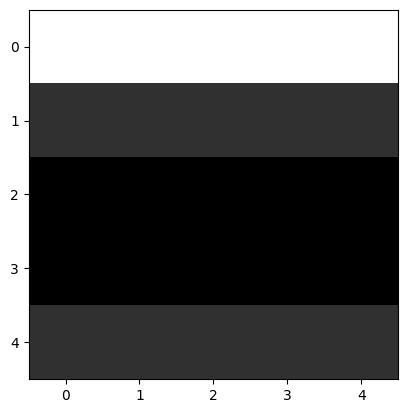

In [ ]:
import scipy.fftpack as fftim
a = np.mgrid[:5, :5][0]
display("a",a)
plt.imshow(a, cmap='gray')
a = np.fft.fft2(a)
display("fft2 a", a)
a = abs(a)
display("abs", a)
a = fftim.fftshift(a)
display("fftim a", a)
a = np.fft.ifft2(a, s=None, axes=(-2,-1))
display(a)
a = abs(a)
plt.imshow(a, cmap='gray')

Text(0.5, 1.0, 'Output of FFT')

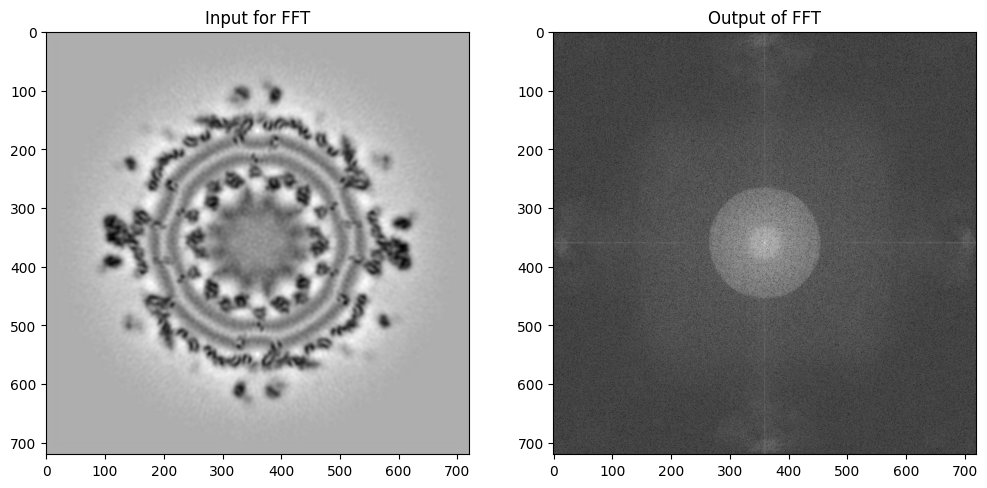

In [ ]:
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
# b = Image.open('../Figures/fft1.png').convert('L')
b = Image.open('/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/temp/fft1.png').convert('L')
# Performing FFT.
c = abs(fftim.fft2(b))
# Shifting the Fourier frequency image. The center of the image is the center of the Fourier spectrum. The center pixel corresponds to a frequency of 0 in both directions.
# left(-u), right(+u), top(+v), bottom(-v)
d = fftim.fftshift(c)
# Converting the d to floating type and saving it
# as fft1_output.raw in Figures folder.
d.astype('float').tofile('fft1_output.raw')
# Take the logarithm of the raw image (Log-transform to enhance visualization).
d_log = np.log1p(d)
# Display image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(b, cmap='gray')
plt.title("Input for FFT")
plt.subplot(1,2,2)
plt.imshow(d_log, cmap='gray')
plt.title("Output of FFT")


### Bandpass idea

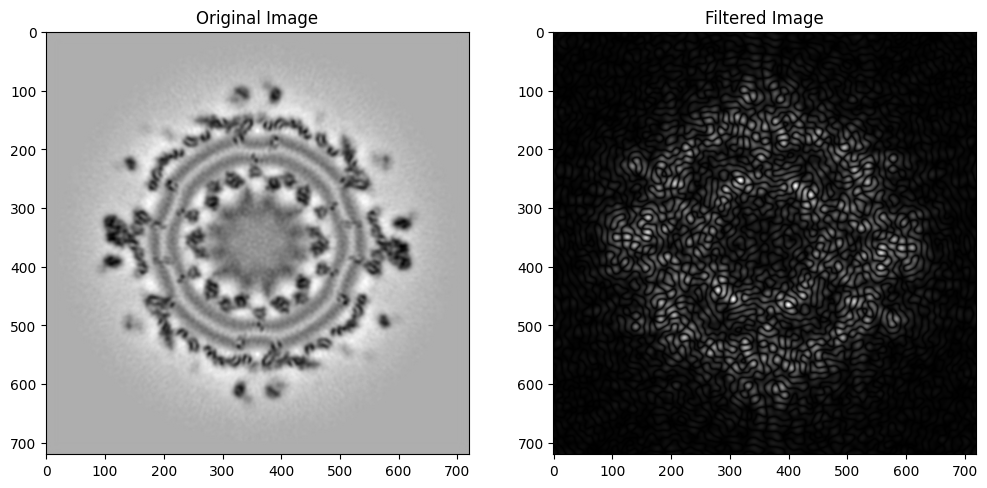

In [ ]:
import scipy.misc
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
# Opening the image and converting it to grayscale.
b = Image.open('/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/temp/fft1.png').convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image .
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.zeros((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # minimum cut-off radius
d_1 = 50.0 # maximum cut-off radius

# Defining the convolution function for bandpass
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using min and max cut-off to create
# the band or annulus.
        if r > d_0 and r < d_1:
            H[i,j] = 1.0

# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H

# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# # Saving the image as ibandpass_output.png.
# cv2.imwrite('../Figures/ibandpass_output.png', e)

# Display the original and processed images side by side
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(b, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(e, cmap='gray')
# plt.title(f'Lowcut={lowcut}, Highcut={highcut}, Order={order}')
plt.title('Filtered Image')

plt.show()

GitHub Copilot: The Butterworth bandpass filter is a type of filter that passes frequencies within a certain range and rejects frequencies outside that range. The parameters of the filter, including the low cut-off frequency (`lowcut`), high cut-off frequency (`highcut`), and order (`order`), can significantly affect the output image in terms of brightness, noise, edge sharpness, and detail.

1. `lowcut`: This parameter determines the smallest features that will be preserved in the image. If `lowcut` is set too high, smaller details in the image may be lost, and the image may appear blurred. This can also reduce the overall brightness of the image, as the low frequencies in the Fourier domain correspond to the overall brightness in the spatial domain.

2. `highcut`: This parameter determines the largest features that will be preserved in the image. If `highcut` is set too low, larger details in the image may be lost, and the image may appear more noisy. This can also reduce the contrast of the image, as the high frequencies in the Fourier domain correspond to the edges and fine details in the spatial domain.

3. `order`: This parameter determines the sharpness of the transition between the passband and the stopband. A higher order results in a steeper transition, which can help to more precisely control which frequencies are passed and which are stopped. However, a higher order can also result in more ringing artifacts in the spatial domain, which can appear as ripples or echoes near the edges of objects.

In general, you would need to adjust these parameters based on the specific characteristics of your image and the desired output. For example, if your image has a lot of small details and you want to preserve these while reducing noise, you might choose a lower `lowcut` and a higher `highcut`. If your image has a lot of large objects and you want to enhance these while reducing smaller details, you might choose a higher `lowcut` and a lower `highcut`. The `order` can be adjusted based on how sharp you want the transition between the passband and the stopband to be.

In [ ]:
rows, cols = 3, 4 # image.shape

# # part code 1:
# Create a meshgrid for the (u, v) coordinates
x = np.linspace(-0.5, 0.5, cols, endpoint=False) * cols
y = np.linspace(-0.5, 0.5, rows, endpoint=False) * rows
x, y = np.meshgrid(x, y)
radius = np.sqrt(x**2 + y**2)
# Calculate the distance to the center of the frequency domain
display(x, y, radius)

# part code 2:
x = np.linspace(-0.5, 0.5, cols) * cols
y = np.linspace(-0.5, 0.5, rows) * rows
radius = np.sqrt((x[np.newaxis,:]**2) + (y[:,np.newaxis]**2))
display(x, y, radius)

array([[-2., -1.,  0.,  1.],
       [-2., -1.,  0.,  1.],
       [-2., -1.,  0.,  1.]])

array([[-1.5, -1.5, -1.5, -1.5],
       [-0.5, -0.5, -0.5, -0.5],
       [ 0.5,  0.5,  0.5,  0.5]])

array([[2.5       , 1.80277564, 1.5       , 1.80277564],
       [2.06155281, 1.11803399, 0.5       , 1.11803399],
       [2.06155281, 1.11803399, 0.5       , 1.11803399]])

array([-2.        , -0.66666667,  0.66666667,  2.        ])

array([-1.5,  0. ,  1.5])

array([[2.5       , 1.6414763 , 1.6414763 , 2.5       ],
       [2.        , 0.66666667, 0.66666667, 2.        ],
       [2.5       , 1.6414763 , 1.6414763 , 2.5       ]])

GitHub Copilot: The radius calculation is used to determine the distance of each point in the frequency domain from the center. This distance is then used to determine whether a given frequency should be passed or stopped by the filter.

In Code 1, the `np.meshgrid` function is used to create a two-dimensional grid of `x` and `y` values, and the radius is calculated as the Euclidean distance from each point to the center of the grid (0.5, 0.5). This means that the filter will be centered around the middle of the frequency domain, which corresponds to the low frequencies in the image.

In Code 2, the `x` and `y` values are scaled by the width and height of the image, respectively, before the radius is calculated. This means that the filter will be centered around the origin of the frequency domain, which corresponds to the high frequencies in the image.

The choice between these two methods depends on the specific characteristics of your image and the desired output. If your image has a lot of high-frequency noise that you want to remove, you might choose the method from Code 2. If your image has a lot of low-frequency noise or you want to preserve the low-frequency components of the image, you might choose the method from Code 1.

In both cases, you would need to adjust the `lowcut` and `highcut` frequencies based on the specific frequencies you want to pass or stop. The `lowcut` frequency should be set to the smallest feature size you want to preserve, and the `highcut` frequency should be set to the largest feature size you want to preserve.

### Option 4:
ref: https://www.mathworks.com/matlabcentral/fileexchange/30946-butterworth-bandpass-filter-for-image-processing

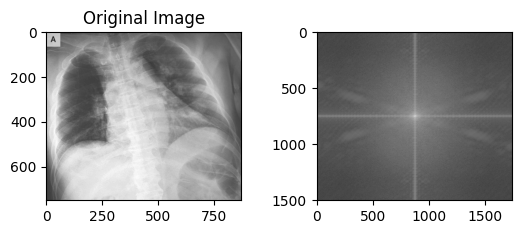

<ipython-input-13-a29d06bcdd73>:81: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


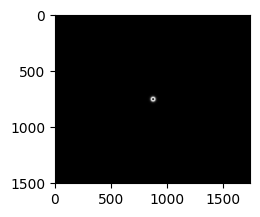

<ipython-input-13-a29d06bcdd73>:104: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 4)


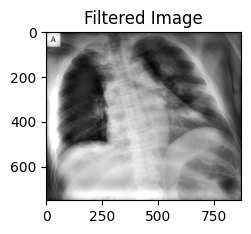

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fftshow(f, type='log'):
    if type == 'log':
        fl = np.log1p(np.abs(f))
        fm = np.max(fl)
        # print('Maximum value after log transformation:', fm)
        # plt.imshow((fl / fm * 255).astype(np.uint8), cmap='gray')
        # Scale the image to the range [0, 255] and convert it to an 8-bit unsigned integer
        image = cv2.normalize(fl/fm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.show()
    elif type == 'abs':
        fa = np.abs(f)
        fm = np.max(fa)
        # print('Maximum value after absolute transformation:', fm)
        # plt.imshow((fa / fm * 255).astype(np.uint8), cmap='gray')
        # Scale the image to the range [0, 255] and convert it to an 8-bit unsigned integer
        image = cv2.normalize(fa/fm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.show()
    else:
        raise ValueError('TYPE must be abs or log.')

    plt.show()

def butterworthbpf(I, d0, d1, n, save_path=None):
    f = np.double(I)
    # display('Converted image to double precision.', f[0,0:10])
    nx, ny = f.shape
    # display(f'Image dimensions: {str(nx)} x {str(ny)}');
    f = np.uint8(f)
    fftI = np.fft.fft2(f, (2 * nx - 1, 2 * ny - 1))
    # display("fftI:", fftI[0,:5])
    fftI = np.fft.fftshift(fftI)
    # display("fftI:", fftI[0,:5])


    plt.subplot(2, 2, 1)
    plt.imshow(f, cmap='gray')
    plt.title('Original Image')

    plt.subplot(2, 2, 2)
    fftshow(fftI, 'log')
    plt.title('Image in Fourier Domain')

    # Initialize filter.
    # filter1 = np.ones((2 * nx - 1, 2 * ny - 1), dtype=np.double)
    # filter2 = np.ones((2 * nx - 1, 2 * ny - 1), dtype=np.double)
    # filter3 = np.ones((2 * nx - 1, 2 * ny - 1), dtype=np.double)
    filter1 = np.ones((2 * nx - 1, 2 * ny - 1))
    filter2 = np.ones((2 * nx - 1, 2 * ny - 1))
    filter3 = np.ones((2 * nx - 1, 2 * ny - 1))

    for i in range(2 * nx - 1):
        for j in range(2 * ny - 1):
    # for i in range(1, 2 * nx - 1):
    #     for j in range(1, 2 * ny - 1):
            dist = np.sqrt((i+1 - (nx + 1))**2 + (j+1 - (ny + 1))**2)
            # if i<=1 and j<=1:
            #     print(dist)
            # Create Butterworth filter.
            filter1[i, j] = 1 / (1 + (dist / d1)**(2 * n))
            filter2[i, j] = 1 / (1 + (dist / d0)**(2 * n))
            filter3[i, j] = 1.0 - filter2[i, j]
            filter3[i, j] = filter1[i, j] * filter3[i, j]
            # if i <=1 and j <=1:
            #     print(filter1[i, j])
            #     print(filter2[i, j])
            #     print(filter3[i, j])

    # Update image with passed frequencies.
    filtered_image = fftI + filter3 * fftI
    # display('fftI:', fftI[0,:5])
    # display('fft3:', filter3[:2,:5])
    # display('filtered_image:', filtered_image[0,:5])

    plt.subplot(2, 2, 3)
    fftshow(filter3, 'log')
    plt.title('Filter Image')

    filtered_image = np.fft.ifftshift(filtered_image)
    # print('filtered_image 1:', filtered_image[:2,:5])
    # print(filtered_image[-2:,-5:])
    filtered_image = np.fft.ifft2(filtered_image, (2 * nx - 1, 2 * ny - 1))
    # print('filtered_image 2:', filtered_image[:2,:5])
    # print(filtered_image[-2:,-5:])
    filtered_image = np.real(filtered_image[:nx, :ny])
    # print('filtered_image 3:', filtered_image[:2,:5])
    # print(filtered_image[-2:,-5:])
    filtered_image = np.clip(filtered_image, 0, 255) # clip: modify outliers become 0 or 255 -> result will be the same for next syntax unint8 in Matlab
    # # Rescale intensities to the range [0, 255]. -> result slightly different from Matlab
    # filtered_image = cv2.normalize(src=filtered_image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    filtered_image = np.uint8(np.round(filtered_image))
    # print('filtered_image 4:', filtered_image[:2,:5])
    # print(filtered_image[-2:,-5:])

    if save_path is not None:
        cv2.imwrite(save_path + '/filtered_image.jpg', filtered_image)

    plt.subplot(2, 2, 4)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered Image')

    plt.show()

    return filtered_image


# Example usage:
# ima = cv2.imread('path/to/your/image.jpg', cv2.IMREAD_GRAYSCALE)
# butterworthbpf(ima, 30, 120, 4)

# Read the image
ima = cv2.imread('/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample/covid/001.jpeg', cv2.IMREAD_GRAYSCALE)
# ima = Image.open('/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample/covid/001.jpeg')

# Display the first 10 pixels of the first row
# print("image:", ima[0, :10])

# Display the first 10 pixels of the first row
# print("gray image:", ima[0, :10])
filtered_image = butterworthbpf(ima, 10, 20, 3, save_path='/content')


#### Parameter Finetune

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

def fftshow(f, type='log'):
    if type == 'log':
        fl = np.log1p(np.abs(f))
        fm = np.max(fl)
        # Scale the image to the range [0, 255] and convert it to an 8-bit unsigned integer
        image = cv2.normalize(fl/fm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.show()
    elif type == 'abs':
        fa = np.abs(f)
        fm = np.max(fa)
        # Scale the image to the range [0, 255] and convert it to an 8-bit unsigned integer
        image = cv2.normalize(fa/fm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.show()
    else:
        raise ValueError('TYPE must be abs or log.')

    plt.show()

def butterworthbpf(I, d0, d1, n):
    f = np.double(I)
    nx, ny = f.shape
    f = np.uint8(f)
    fftI = np.fft.fft2(f, (2 * nx - 1, 2 * ny - 1))
    fftI = np.fft.fftshift(fftI)

    # plt.subplot(2, 2, 1)
    # plt.imshow(f, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 2, 2)
    # fftshow(fftI, 'log')
    # plt.title('Image in Fourier Domain')

    # Initialize filter.
    filter1 = np.ones((2 * nx - 1, 2 * ny - 1))
    filter2 = np.ones((2 * nx - 1, 2 * ny - 1))
    filter3 = np.ones((2 * nx - 1, 2 * ny - 1))

    for i in range(2 * nx - 1):
        for j in range(2 * ny - 1):
            dist = np.sqrt((i+1 - (nx + 1))**2 + (j+1 - (ny + 1))**2)
            # Create Butterworth filter.
            filter1[i, j] = 1 / (1 + (dist / d1)**(2 * n))
            filter2[i, j] = 1 / (1 + (dist / d0)**(2 * n))
            filter3[i, j] = 1.0 - filter2[i, j]
            filter3[i, j] = filter1[i, j] * filter3[i, j]

    # Update image with passed frequencies.
    filtered_image = fftI + filter3 * fftI

    # plt.subplot(2, 2, 3)
    # fftshow(filter3, 'log')
    # plt.title('Filter Image')

    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image, (2 * nx - 1, 2 * ny - 1))
    filtered_image = np.real(filtered_image[:nx, :ny])
    filtered_image = np.clip(filtered_image, 0, 255) # clip: modify outliers become 0 or 255 -> result will be the same for next syntax unint8 in Matlab
    # # Rescale intensities to the range [0, 255]. -> result slightly different from Matlab
    # filtered_image = cv2.normalize(src=filtered_image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    filtered_image = np.uint8(np.round(filtered_image))

    # plt.subplot(2, 2, 4)
    # plt.imshow(filtered_image, cmap='gray')
    # plt.title('Filtered Image')

    # plt.show()

    return filtered_image


# Define samples to test
img_path = ['/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/11[11]/11_0_0.jpg',
            '/content/Brain-CT-Hemorrhage-Dataset/dataset/NORMAL/N10[N10]/N10_0_10.jpg',]

# Define the parameters to test
lowcuts = [10, 15, 20]
highcuts = [20, 25, 30]
orders = [3]

# Test each combination of parameters
for path in img_path:
  for lowcut in lowcuts:
    for highcut in highcuts:
        for order in orders:

          # Load the image
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

          # CLAHE (Contrast Limited Adaptive Histogram Equalization)
          clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
          cl1 = clahe.apply(img)

          # Apply Butterworth bandpass filter with the current parameters
          filtered_img = butterworthbpf(I=cl1, d0=lowcut, d1=highcut, n=order)

          # Display the original and processed images side by side
          plt.figure(figsize=(18,6))

          plt.subplot(1,3,1)
          plt.imshow(img, cmap='gray')
          plt.title('Original Image')

          plt.subplot(1,3,2)
          plt.imshow(cl1, cmap='gray')
          plt.title('CLAHE')

          plt.subplot(1,3,3)
          plt.imshow(filtered_img, cmap='gray')
          plt.title('Filtered Image')

          # Add a common title
          plt.suptitle(f'Lowcut={lowcut}, Hightcut={highcut}, Order={order}')
          plt.show()

          # Calculate the metrics for the filtered image
          psnr, mse, rmse, snr, ambe = calculate_metrics(cl1, filtered_img)
          print(f"PSNR: {psnr}")
          print(f"MSE: {mse}")
          print(f"RMSE: {rmse}")
          print(f"SNR: {snr}")
          print(f"AMBE: {ambe}")

Output hidden; open in https://colab.research.google.com to view.

### CLAHE + Butterworth

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

def fftshow(f, type='log'):
    if type == 'log':
        fl = np.log1p(np.abs(f))
        fm = np.max(fl)
        # Scale the image to the range [0, 255] and convert it to an 8-bit unsigned integer
        image = cv2.normalize(fl/fm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.show()
    elif type == 'abs':
        fa = np.abs(f)
        fm = np.max(fa)
        # Scale the image to the range [0, 255] and convert it to an 8-bit unsigned integer
        image = cv2.normalize(fa/fm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.show()
    else:
        raise ValueError('TYPE must be abs or log.')

    plt.show()

def butterworthbpf(I, d0, d1, n):
    f = np.double(I)
    nx, ny = f.shape
    f = np.uint8(f)
    fftI = np.fft.fft2(f, (2 * nx - 1, 2 * ny - 1))
    fftI = np.fft.fftshift(fftI)

    # plt.subplot(2, 2, 1)
    # plt.imshow(f, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 2, 2)
    # fftshow(fftI, 'log')
    # plt.title('Image in Fourier Domain')

    # Initialize filter.
    filter1 = np.ones((2 * nx - 1, 2 * ny - 1))
    filter2 = np.ones((2 * nx - 1, 2 * ny - 1))
    filter3 = np.ones((2 * nx - 1, 2 * ny - 1))

    for i in range(2 * nx - 1):
        for j in range(2 * ny - 1):
            dist = np.sqrt((i+1 - (nx + 1))**2 + (j+1 - (ny + 1))**2)
            # Create Butterworth filter.
            filter1[i, j] = 1 / (1 + (dist / d1)**(2 * n))
            filter2[i, j] = 1 / (1 + (dist / d0)**(2 * n))
            filter3[i, j] = 1.0 - filter2[i, j]
            filter3[i, j] = filter1[i, j] * filter3[i, j]

    # Update image with passed frequencies.
    filtered_image = fftI + filter3 * fftI

    # plt.subplot(2, 2, 3)
    # fftshow(filter3, 'log')
    # plt.title('Filter Image')

    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image, (2 * nx - 1, 2 * ny - 1))
    filtered_image = np.real(filtered_image[:nx, :ny])
    filtered_image = np.clip(filtered_image, 0, 255) # clip: modify outliers become 0 or 255 -> result will be the same for next syntax unint8 in Matlab
    # # Rescale intensities to the range [0, 255]. -> result slightly different from Matlab
    # filtered_image = cv2.normalize(src=filtered_image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    filtered_image = np.uint8(np.round(filtered_image))

    # plt.subplot(2, 2, 4)
    # plt.imshow(filtered_image, cmap='gray')
    # plt.title('Filtered Image')

    # plt.show()

    return filtered_image

In [10]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, os.path.join(dest_dir, item), preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                # Define the output file path
                filename_with_ext = os.path.basename(src_item_path)
                filename, extension = os.path.splitext(filename_with_ext)
                dest_item_path = os.path.join(dest_dir, filename + '.jpg')

                # Check if output file already exists
                if not os.path.exists(dest_item_path):
                    img = cv2.imread(src_item_path)
                    if img is not None:
                        img = preprocess_func(img)

                        # Export the preprocessed image to the output folder
                        cv2.imwrite(dest_item_path, img)


# Define your preprocessing function here
def preprocess_func(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(gray)

    # Apply Butterworth bandpass filter with the current parameters
    filtered_img = butterworthbpf(cl1, d0=15, d1=30, n=3)

    return filtered_img

# Usage:
# dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/sample'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-CT-Hemorrhage-Dataset/CLAHE_Butterworth_sample11'
# dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/dataset'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-CT-Hemorrhage-Dataset/CLAHE_Butterworth'
dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-CT-Hemorrhage-Dataset/CLAHE_Butterworth/Hemorrhagic'
preprocess_and_copy(dataset_path, output_path, preprocess_func)
